Cell Initilization: The cell below has an initialization Cell tag which can be seen by Menu Bar:View > Cell Toolbar > Initialization Cell nb tick Initialization Cells in NBExtensions tab. The intended outcome is that the cell below is run as an initialization cell and the javascript it contains automatically runs all the cells in the entire notebook. See https://stackoverflow.com/questions/31984196/ipython-notebook-run-all-cells-on-open



In [58]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

going to tag  one


In [59]:
# https://github.com/jupyter-widgets/ipywidgets/issues/2382 see jetheurer's comment/solution
# WORKING ON THIS ONE...

from ipywidgets import RadioButtons, Text, Select, Dropdown, Label, jslink, Combobox, Output, HTML, VBox
from ipywidgets.widgets.widget import Widget, register, widget_serialization
from ipywidgets.widgets.widget_core import CoreWidget
from IPython.display import  display, clear_output

from traitlets import Unicode, Tuple, Instance, TraitError

# mcg is a list of lists 
# each list consists of a string (the stem) & a list of distractor tuples (distractor string and response string)
mcq=[
['The amount of gas exhaled after a maximal inpiration followed by a maximal expiration is the:', [('choose',''),('IC', 'Try again...'),('RV','Try again...'),('VC','Correct!'), ('TV', 'Try again...')]],
['The amount of gas in the lungs after a maximal inspiration is the:',[('choose',''),('IC','Try again...'),('IRV','Try again...'),('TLC','Correct!')]],
['Where does gas exchange occur?',[('choose',''),('pulmonary artery','Try again...'),('bronchioles','Try again...'),('alveoli','Correct!'), ('pleura', 'Try again...')]],
['The pleura that surrounds the lungs consists of two layers, the ________.',[('choose',''),('visceral & parietal pleurae','Correct!'),('mediastinal & parietal pleurae','Try again'),('visceral & mediastinal pleurae','Try again'),('none of the above','Try again')]],    
['finished',[('no option','')]]    
]

def text_eventhandler(change):  # argument comes from the observe function, see below
        if change['new']=='Correct!':
        #if change.new=='Correct!': 
            global i, stem_out, selection, text
            i += 1
            stem_out.value=mcq[i][0]
            selection.options=mcq[i][1]
#         with output:
#             clear_output()
#             print(i, len(mcq))
            if len(mcq)-1==i:
                stem_out.value="Finished" 
                text.placeholder="All questions have been answered..."
        return 

i=0
output=Output()
Dropdown.value.tag(sync=True)  # whatever value is selected in the Dropdown becomes the value in the Text
stem_out = Label(value=mcq[i][0])  # the stem string from mcq
selection = Dropdown(options=mcq[i][1]) # response string from the distractor tuple is the new text value
text = Text(placeholder='choice evaluation...')
jslink((selection, 'value'), (text, 'value'))
display(stem_out, selection, text, output)
text.observe(text_eventhandler, names='value')  # names is just one trait in this case i.e., value




 

Label(value='The amount of gas exhaled after a maximal inpiration followed by a maximal expiration is the:')

Dropdown(options=(('choose', ''), ('IC', 'Try again...'), ('RV', 'Try again...'), ('VC', 'Correct!'), ('TV', '…

Text(value='', placeholder='choice evaluation...')

Output()

In [60]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def f(x):
    return x

interact(f, x=(0,10,1));

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

In [61]:
# SHOWS A COLOURED TEXT BOX
# https://codingrelic.geekhold.com/2019/06/ipywidgets-text-background-color.html

from ipywidgets import Text, HTML, VBox
from IPython.display import display

# define a css style for a Text widget that has a green background called "gbg_style"
gbg_style = "<style>.green_text_input_class    input { background-color:#D0F0D0 !important; }</style>"
# nb a CSS class selector is a name preceded by a full stop (“.”)
# select and style all elements with class="green_text_input_class":

# define a css style for a Text widget that has a red background called "rbg_style"
rbg_style = "<style>.red_text_input_class    input { background-color:coral !important; }</style>"


# instantiate Text widget
text  = Text()

# add CSS class to the Text widget
text.add_class('green_text_input_class') 
text.add_class('red_text_input_class') 

# widgets.HTML() feature allows use of css and HTML
# hued_text is a child descendent of text
# descendants are rendered in HTML <style> block 

background='r'

if background == 'r':
   hued_text = [HTML(rbg_style),text]
    
        
if background == 'g':
    hued_text = [HTML(gbg_style),text]
    
VBox(hued_text)

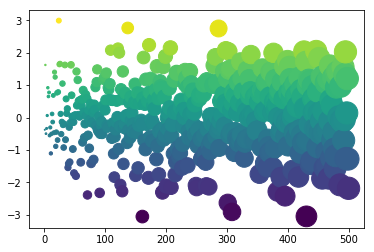

In [62]:
# https://jupyterbook.org/features/interactive_cells.html

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

x = np.arange(500)
y = np.random.randn(500)

fig, ax = plt.subplots()
ax.scatter(x, y, c=y, s=x)

In [63]:
# THIS WORKS FINE BUT YOU HAVE TO CREATE A WIDGET PER QUESTION
# https://github.com/jupyter-widgets/ipywidgets/issues/2487

import ipywidgets as widgets
from IPython.display import display

# mcq is a nested list of mcq items 
# mcq items are themselves lists consisting of a stem, descriptors and an answer key
mcq=[
['The amount of gas exhaled after a maximal inpiration followed by a maximal expiration is the:',['IC','RV','VC','TV'],'VC', ''],
['The amount of gas in the lungs after a maximal inspiration is the:',['IC','IRV','TLC'],'TLC', ''],
['Where does gas exchange occur?',['pulmonary artery','bronchioles','alveoli', 'pleura'],'alveoli', ''],
['The pleura that surrounds the lungs consists of two layers, the ________.', ['visceral and parietal pleurae', 'mediastinal and parietal pleurae', 'visceral and mediastinal pleurae', 'none of the above'], 'visceral and parietal pleurae', '']
]


def create_multipleChoice_widget(n):
    i=0    # i controls the while loop that iterates the mcq items
    ro_array=[]  # the options that each RadioButtons widget displays
    stem_array=[] # questions asked in each stem_out label
    key_index_array=[] # answer key for each mcq item
    
    stem_out = widgets.Label(value='')  # label that asks a question
    feedback_out = widgets.Label(value='')  # label that gives feedback

    # handler called when RadioButtons option changes. The change is a dictionary holding the information
    # about the change
    def RB_thingy_eventhandler(change):  # the dictionary argument comes from the observe function, see below
        if change.new==key_index_array[n]:  # the new key specifies the new value of RadioButtons widget     
            s = r'\(\color{green} {Correct!}\)'    
        else:
            s = r'\(\color{red} {Try \ again...}\)'
        
        feedback_out.value=s
            
        return
           
    # we need each question, possible answers and the right answer 
    while i < len(mcq[0]):  # from the nested list of mcq items
        stem=mcq[i][0]
        stem_array.append(stem)
        distractors=mcq[i][1]
        key=mcq[i][2]
        i += 1       # controls the while loop
        
        # add the right answer on end of possible answers if not already there
        if key not in distractors:
            distractors.append(key)
        # this is where the right answer is located
        key_index = distractors.index(key)
        # list of all the right answers
        key_index_array.append(key_index)
        # what the buttons show
        radio_options = [(words, i) for i, words in enumerate(distractors)] 
        # list of what buttons should show for each mcq question
        ro_array.append(radio_options)

    stem_out.value=stem_array[n]  # label to show the question gets the right question sequentially
    options=ro_array[n] # requisite options loaded sequentially
    
    # the RadioButtons widget
    RB_thingy = widgets.RadioButtons(
            options = options,
            discription='',
            value=None, # starts with nothing selected
            disabled = False
            )
    
    # observe the RadioButtons widget for any changes...    
    # call observe with the name of the function that you want to bind to as well as which traits you want
    # to "observe" i.e., value changes from None to an int when an option is chosen
    
    # The observe function returns a dictionary of any number of traits that have changed.
    # This dictionary is returned as an argument to RB_thingy_eventhandler(change), our change event handler which
    # has a change parameter
    RB_thingy.observe(RB_thingy_eventhandler, names='value')  # names is just one trait in this case i.e., value
    #  create_multipleChoice_widget returns a layout of widgets for display
    return widgets.VBox([stem_out, RB_thingy, feedback_out])

for q in range(len(mcq[0])):  # iterate through all mcq question items
    quiz = create_multipleChoice_widget(q)  # create widget
    display(quiz)  # show it all



    



In [64]:
# https://stackoverflow.com/questions/55244865/pause-jupyter-notebook-widgets-waiting-for-user-input?noredirect=1&lq=1

from ipywidgets import Button
import asyncio

def wait_for_change(widget):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.description)
        widget.on_click(getvalue, remove=True) 
        # we need to free up the binding to getvalue to avoid an IvalidState error
        # buttons don't support unobserve
        # so use `remove=True` 
    widget.on_click(getvalue)
    return future

button=Button(description="wow")

list_to_tag = ["one", "two", "three", "four"]

async def f():
    for i in list_to_tag:
        print('going to tag ', i)
        x = await wait_for_change(button)
        print("tagged ", i, "with  %s"%x)
        print("")

asyncio.create_task(f())
button

Button(description='wow', style=ButtonStyle())